In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import numpy as np
import pandas as pd
wine_df = pd.read_csv('dataset/winequality-red.csv')
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df.drop('quality', axis=1))
scaled_wine_data = pd.DataFrame(scaled_features, columns=wine_df.columns[:-1])
scaled_wine_data['quality'] = wine_df['quality']

### 利用高斯函數進行OverSampling

In [20]:
# Correcting the code to properly handle the generation of Gaussian samples
def gaussian_oversample(data, class_label, n_samples):
    class_data = data[data['quality'] == class_label]
    # Calculate mean and standard deviation
    mean = class_data.mean(axis=0)
    std = class_data.std(axis=0)
    # Generate Gaussian samples
    samples = np.random.randn(n_samples, class_data.shape[1]-1) * std.values[:-1] + mean.values[:-1]
    new_samples = pd.DataFrame(samples, columns=class_data.columns[:-1])
    new_samples['quality'] = class_label
    return new_samples

# Define the number of samples to generate for each minority class
n_samples_3 = 500 - wine_df[wine_df['quality'] == 3].shape[0]
n_samples_8 = 500 - wine_df[wine_df['quality'] == 8].shape[0]
n_samples_4 = 300 - wine_df[wine_df['quality'] == 4].shape[0]

# Generate samples with corrected function
corrected_synthetic_samples_3 = gaussian_oversample(scaled_wine_data, 3, n_samples_3)
corrected_synthetic_samples_8 = gaussian_oversample(scaled_wine_data, 8, n_samples_8)
corrected_synthetic_samples_4 = gaussian_oversample(scaled_wine_data, 4, n_samples_4)

# Append corrected synthetic samples to the original dataset
gaussian_balanced_wine_data = pd.concat([scaled_wine_data, corrected_synthetic_samples_3, corrected_synthetic_samples_8, corrected_synthetic_samples_4])

# Show the new counts for the quality ratings
gaussian_balanced_wine_data['quality'].value_counts()


quality
5    681
6    638
8    500
3    500
4    300
7    199
Name: count, dtype: int64

### 查看sampling前與GaussianSampling後得的資料分佈狀態

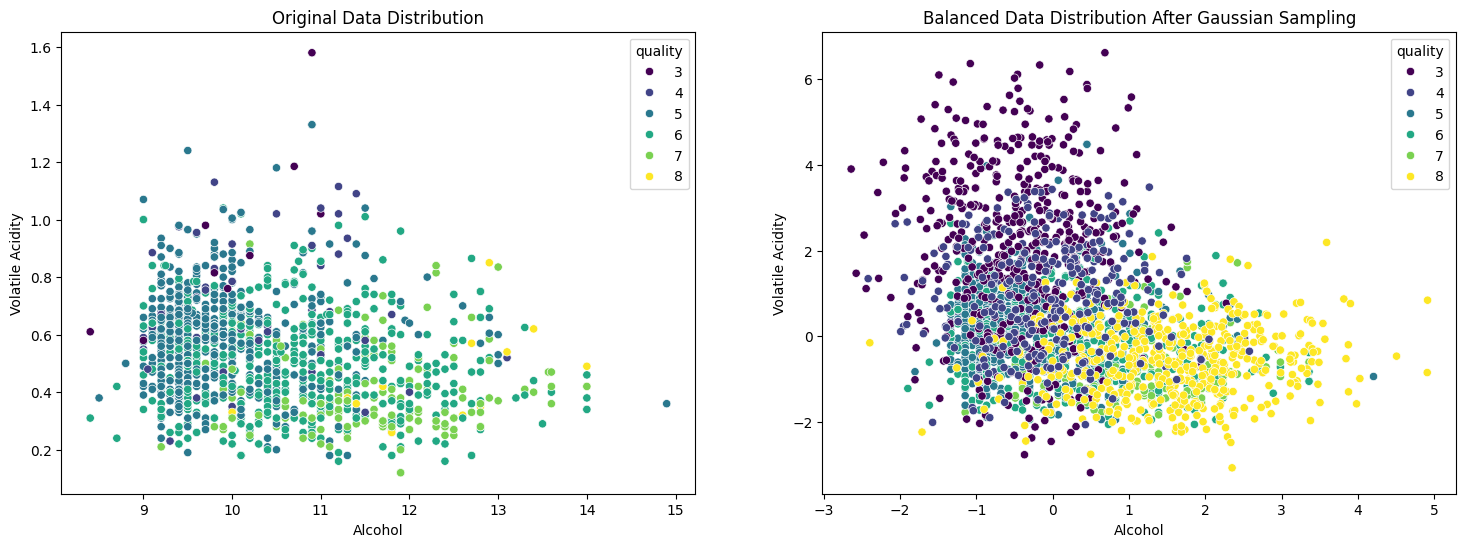

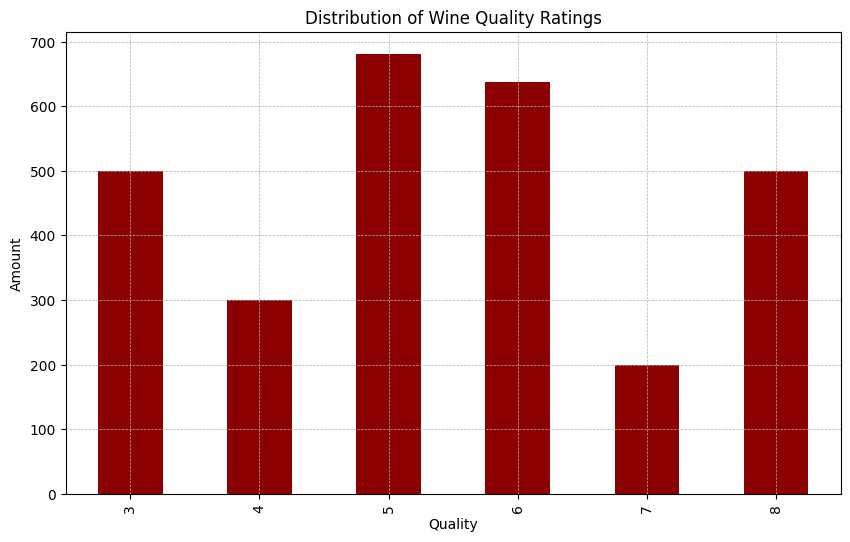

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Setting up the subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data plot
sns.scatterplot(ax=ax[0], data=wine_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Volatile Acidity')

# Balanced data plot
sns.scatterplot(ax=ax[1], data=gaussian_balanced_wine_data, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[1].set_title('Balanced Data Distribution After Gaussian Sampling')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Volatile Acidity')
plt.show()

plt.figure(figsize=(10, 6))
gaussian_balanced_wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [22]:
gaussian_balanced_wine_data.to_csv('dataset/gaussian_balanced_wine_data.csv')